In [14]:
import numpy as np

#퍼셉트론 객체로 구현하기
class Perceptron(object):
    
    #생성자 (eta: 학습률, n_iter: 반복횟수, random_state: 난수 생성기 시드)
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
    
    #학습시키기
    def fit(self, X,y):
        rgen=np.random.RandomState(self.random_state)
        #w:가중치(표준 편차가 0.01인 정규분포에서 뽑은 랜덤 작은 수)
        self.w_=rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        #
        self.errors_=[]
        
        for _ in range(self.n_iter):
            errors=0
            for xi,target in zip(X,y):
                update=self.eta*(target-self.predict(xi))
                self.w_[1:]+=update*xi
                self.w_[0]+=update
                errors +=int(update!=0.0)
            self.errors_.append(errors)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X)>=0.0, 1, -1)
        

In [15]:
import pandas as pd

df=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [16]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]]


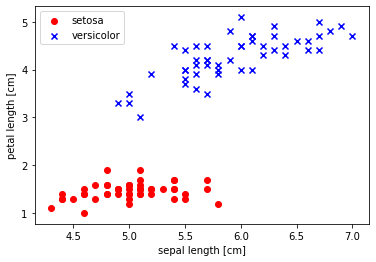

In [17]:
import matplotlib.pyplot as plt
import numpy as np

y=df.iloc[0:100,4].values
y=np.where(y=='Iris-setosa',-1, 1)

X=df.iloc[0:100, [0,2]].values
print(X[0:5][:])
plt.scatter(X[:50, 0], X[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

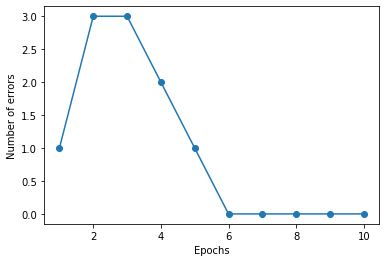

In [18]:
ppn=Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.show()

In [20]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    markers=('s', 'x', 'o', '^', 'v')
    colors=('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max=X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max=X[:,1].min()-1, X[:,1].max()+1
    xx1,xx2=np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z=classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1], alpha=0.8, c=colors[idx], label=cl, edgecolor='black')

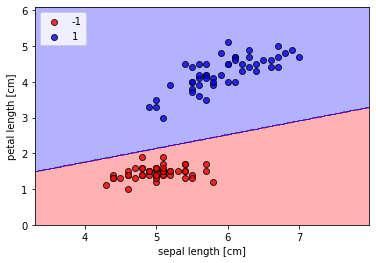

In [21]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [23]:
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
        
    def fit(self, X, y):
        rgen=np.random.RandomState(self.random_state)
        self.w_=rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_=[]
        
        for i in range(self.n_iter):
            net_input=self.net_input(X)
            output=self.activation(net_input)
            errors=(y-output)
            self.w_[1:]+=self.eta*X.T.dot(errors)
            self.w_[0]+=self.eta*errors.sum()
            cost=(errors**2).sum()/2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X))>=0.0, 1, -1)

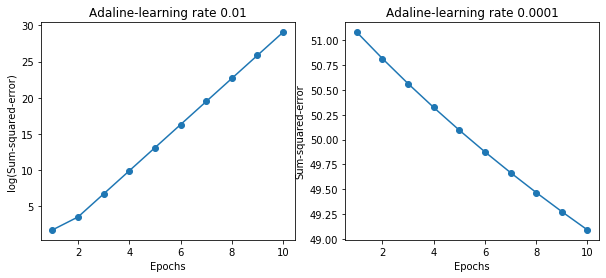

In [24]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ada1=AdalineGD(n_iter=10, eta=0.01).fit(X,y)
ax[0].plot(range(1,len(ada1.cost_)+1),np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline-learning rate 0.01')
ada2=AdalineGD(n_iter=10, eta=0.00001).fit(X,y)
ax[1].plot(range(1, len(ada2.cost_)+1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel("Sum-squared-error")ㅉ
ax[1].set_title("Adaline-learning rate 0.0001")
plt.show()